Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

In [125]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
import pandas as pd
import numpy as np

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [252]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood', 'Burrito', 'Reviewer'])
    
    # Drop columns to prevent "leakage"
    df = df.drop(columns=['Rec', 'overall'])
    
    # Drop columns that have 0 options
    df = df.drop(columns=['Queso'])
    # Drop columns don't know what it is
    df = df.drop(columns=['NonSD', 'Unreliable'])
    
    df.iloc[:,21:-1] = df.iloc[:,21:-1].fillna(0)
    df.iloc[:,21:-1] = df.iloc[:,21:-1].replace(['x', 'X'], [1, 1])
    df['Chips'] = df['Chips'].fillna(0).replace(['x', 'X', 'Yes', 'No'], [1, 1, 1, 0])
    

    
    return df

filepath = DATA_PATH + 'burritos/burritos.csv'

In [257]:
filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)
# print(df.shape)
# print(df.info())
display(df.head())
# print(df.tail())
print(df.nunique())

,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,...,Nopales,Lobster,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-18,3.5,4.2,0,6.49,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,3.5,3.3,0,5.45,3.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,NaN,NaN,0,4.85,1.5,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,NaN,NaN,0,5.25,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-01-27,4.0,3.8,1,6.59,4.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


Yelp               6
Google            18
Chips              2
Cost              98
Hunger            25
Mass (g)          18
Density (g/mL)    21
Length            29
Circum            30
Volume            64
Tortilla          18
Temp              18
Meat              23
Fillings          22
Meat:filling      25
Uniformity        28
Salsa             27
Synergy           27
Wrap              23
Beef               2
Pico               2
Guac               2
Cheese             2
Fries              2
Sour cream         2
Pork               2
Chicken            2
Shrimp             2
Fish               2
Rice               2
Beans              2
Lettuce            2
Tomato             2
Bell peper         2
Carrots            2
Cabbage            2
Sauce              2
Salsa.1            2
Cilantro           2
Onion              2
Taquito            2
Pineapple          2
Ham                2
Chile relleno      2
Nopales            2
Lobster            2
Egg                2
Mushroom     

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [141]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.
# print(df['Hunger'][0:60])

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [255]:
target = 'Great'
y = df[target]
X = df.drop(columns=target)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [265]:
cutoff = '2018-01-01'
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [266]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5822454308093995


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [268]:
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
model_logr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)
model_logr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Beef', 'Pico'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [269]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.9086161879895561
Test MAE: 0.7368421052631579


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

dict_keys(['onehotencoder', 'simpleimputer', 'standardscaler', 'logisticregression'])
[[ 4.17475642e-01 -2.94012138e-01 -3.09464807e-02  2.58916608e-01
   1.96711882e-01 -1.36449306e-01 -7.80940973e-02  1.58077883e-01
   3.77443325e-03 -1.98337248e-02  3.74232366e-01  6.27738577e-01
   1.59519052e+00  1.36953058e+00  1.21448845e+00  5.22643613e-03
   3.77988601e-01  1.73293581e+00 -9.38994957e-03  1.02165048e-01
   1.91229161e-01 -4.60528697e-01 -1.14057338e-01  1.44688468e-01
  -6.52750525e-02  3.45832414e-01 -9.96612471e-02  2.14623117e-01
   1.88697715e-01  1.68830798e-01 -3.06503346e-01 -1.11577540e-01
  -1.11452318e-01  3.39081178e-01 -6.15745561e-01 -3.44374760e-01
  -1.28447385e-01 -2.39264945e-01 -8.24563401e-03 -1.03325251e-03
   2.61213575e-02  1.91627805e-01  1.91209394e-01  4.06013743e-02
  -8.82623686e-02 -6.65156289e-01  3.84521074e-01  2.26051365e-02
   1.83444521e-01 -8.36016110e-02 -1.01107500e-02 -3.02900357e-02
   1.26261172e-01  2.36908387e-01 -1.50850847e-01 -3.467

<AxesSubplot:>

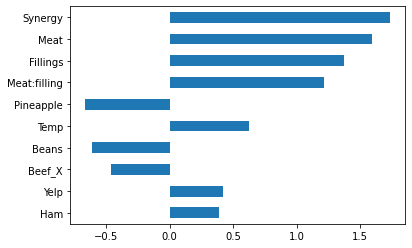

In [281]:
# Create your horizontal barchart here.
import matplotlib.pyplot as plt
print(model_logr.named_steps.keys())
coefficients = model_logr.named_steps['logisticregression'].coef_
print(coefficients)
feat_names = model_logr.named_steps['onehotencoder'].get_feature_names()
print(feat_names)
pd.Series(coefficients[0], index=feat_names).sort_values(key=abs).tail(10).plot(kind='barh')

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [284]:
# Write code here to explore the differences between `predict` and `predict_proba`.
print(model_logr.predict(X_test))
print(model_logr.predict_proba(X_test))

[1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1
 1]
[[5.82111725e-05 9.99941789e-01]
 [3.32880078e-03 9.96671199e-01]
 [5.20237381e-01 4.79762619e-01]
 [5.80637314e-05 9.99941936e-01]
 [9.97660496e-01 2.33950375e-03]
 [8.27516241e-01 1.72483759e-01]
 [3.40677451e-02 9.65932255e-01]
 [3.44348373e-04 9.99655652e-01]
 [1.58473073e-01 8.41526927e-01]
 [4.36394644e-02 9.56360536e-01]
 [3.45366069e-01 6.54633931e-01]
 [9.64471049e-01 3.55289507e-02]
 [4.90334373e-01 5.09665627e-01]
 [2.79065605e-01 7.20934395e-01]
 [1.07535523e-01 8.92464477e-01]
 [1.16792189e-01 8.83207811e-01]
 [2.26920876e-01 7.73079124e-01]
 [9.97134029e-01 2.86597137e-03]
 [9.98542252e-01 1.45774773e-03]
 [9.97158677e-01 2.84132287e-03]
 [9.85030753e-01 1.49692466e-02]
 [2.57723901e-02 9.74227610e-01]
 [8.01418223e-01 1.98581777e-01]
 [5.85343133e-01 4.14656867e-01]
 [1.56598996e-01 8.43401004e-01]
 [8.43515721e-01 1.56484279e-01]
 [9.11831560e-01 8.81684401e-02]
 [3.35610303e-05 9.99966439e-0

**Give your written answer here:**

```


```